In [12]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
import os
from astropy.io import fits
from csv import writer
import pandas as pd
from sklearn.linear_model import LinearRegression

In [13]:
def get_spectra(fitsfile):
    "function to get the spectra from a fits file"
    img_data, img_header = fits.getdata(fitsfile, header=True)
    cdelta1 = img_header['CDELT1']
    crval1  = img_header['CRVAL1']
    npoints = img_header['NAXIS1']
    ll = np.arange(0,npoints)*cdelta1+crval1
    return ll, img_data

def plot_spectra(fitsfile):
    "function to plot in python the spectra" 
    ll, img_data = get_spectra(fitsfile)
    plt.plot(ll,img_data)
    plt.title(fitsfile)
    #plt.savefig(fitsfile, format='fits')
    plt.show()
    
    return fitsfile

In [14]:
def linfit(x,y):
    Sx = 0
    Sy = 0
    Sxy = 0
    Sxx = 0
    for i in range (len(x)):
        Sx += x[i]
        Sy += y[i]
        Sxy += x[i]*y[i]
        Sxx += x[i]**2
    a = (Sx*Sxy - Sy*Sxx)/(Sx**2 - len(x)*Sxx)
    b = (Sx*Sy - len(x)*Sxy)/(Sx**2  - len(x)*Sxx)
    
    ymean=np.mean(y)
    sstot=sum((y-ymean)**2)
    ssres=sum((y-(a+x*b))**2)
    rs=1-ssres/sstot
    return a, b, rs

In [15]:
dirspec1 = '/home/spec/WORK/vsinimoog24/spectra/'
spectra_list1 = os.listdir(dirspec1)
dirspec2 = '/home/spec/WORK/PEEC2024/spectra_vsin2_4/'
spectra_list2 = os.listdir(dirspec2)

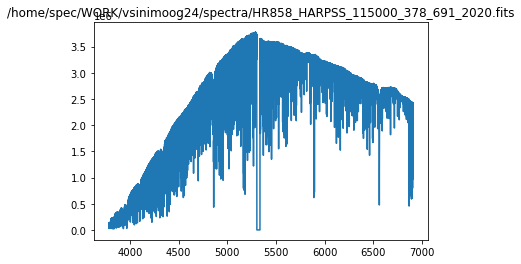

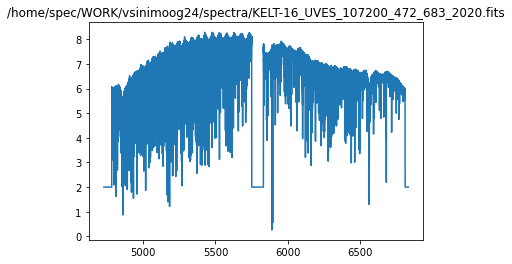

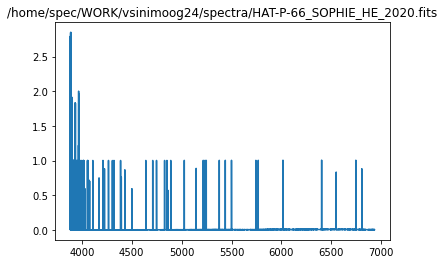

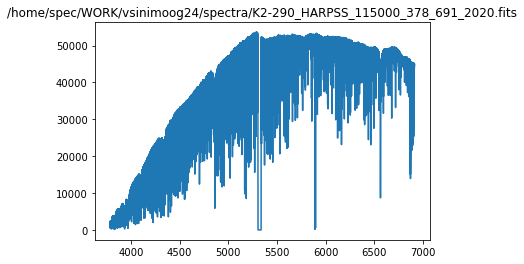

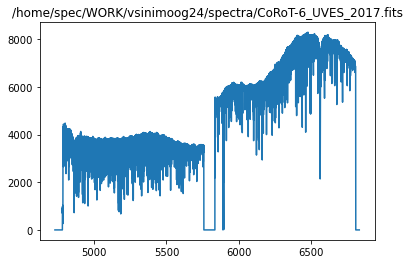

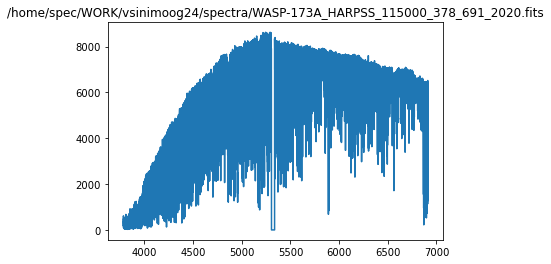

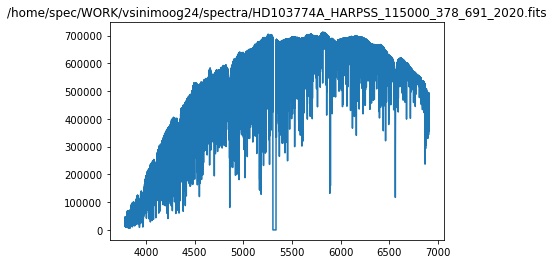

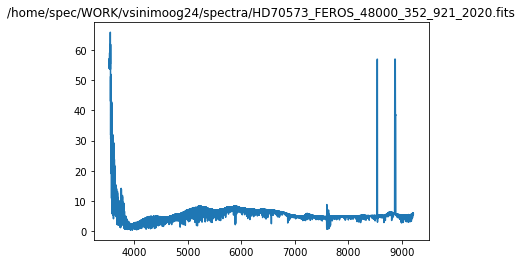

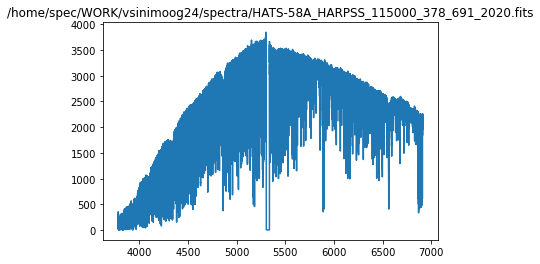

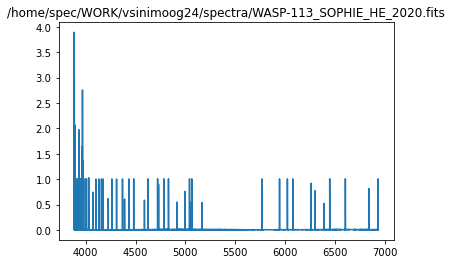

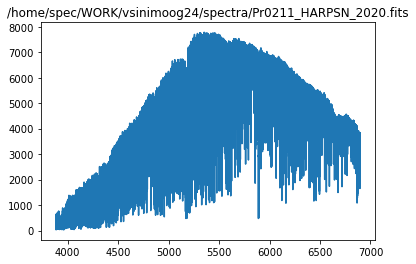

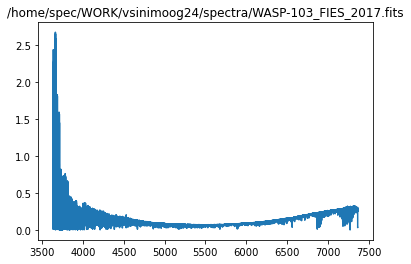

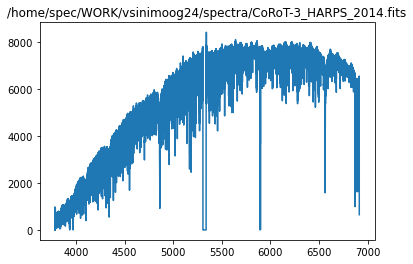

KeyboardInterrupt: 

In [16]:
for s in spectra_list1:
    if 'fits' in s:
        plot_spectra(dirspec1+s)
for s in spectra_list2:
    if 'fits' in s:
        plot_spectra(dirspec2+s)

In [17]:
dir1 = '/home/spec/WORK/vsinimoog24/'
dir2 = '/home/spec/WORK/PEEC2024/'

In [18]:
lit1 = pd.read_csv(dir1+'true_literature.cvs')
results1 = pd.read_csv(dir1+'true_results.csv')
lit2 = pd.read_csv(dir2+'literature_results.csv')
results2 = pd.read_csv(dir2+'newresults.csv')
original1 = pd.read_csv(dir1+'results_simulations.csv')

In [19]:
OR1 = [[],[],[],[],[],[]]

for i in range (len(original1)):
    if (str(original1['comments'][i]) == 'sem extrapolação' or str(original1['comments'][i]) == 'igual') and float(original1['vrot'][i])!=0.1:
        OR1[0].append(str(original1['Star'][i]))
        OR1[1].append(float(original1['vrot'][i]))
        OR1[2].append(float(original1['vrot_err'][i]))
        OR1[3].append(float(original1['vsini_final_err'][i]))
        for j in range (len(results1)):
            if str(results1['Star'][j])==str(original1['Star'][i]):     
                OR1[4].append(results1['vrot'][j])
                OR1[5].append(results1['vsini_final_err'][j])


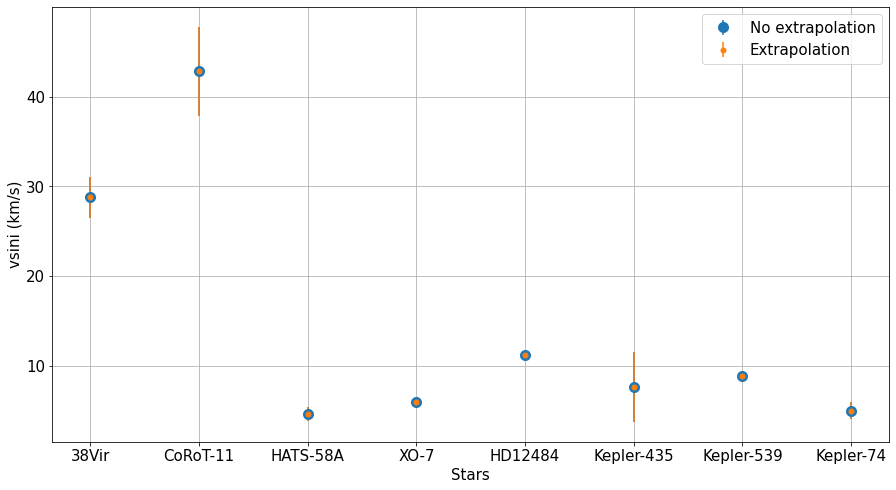

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
ax.errorbar(OR1[0],OR1[1],yerr=OR1[3], fmt=".",markersize=20,label="No extrapolation")
ax.errorbar(OR1[0],OR1[4],yerr=OR1[5], fmt=".",markersize=10,label="Extrapolation")
plt.legend(fontsize=15)
#plt.title('Extrapolation', fontsize=15)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Stars',fontsize=15)
plt.ylabel('vsini (km/s)',fontsize=15)
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/extrapolation.jpg")
plt.show()

In [21]:
RES1 = [[],[],[],[],[],[],[],[],[],[]]
for i in range (len(results1)):
    if 0.1 < float(results1['vrot'][i]):
        RES1[0].append(str(results1['Star'][i]))
        RES1[1].append(float(results1['instr_broad'][i]))
        RES1[2].append(float(results1['teff'][i]))
        RES1[3].append(float(results1['logg'][i]))
        RES1[4].append(float(results1['feh'][i]))
        RES1[5].append(float(results1['vrot'][i]))
        RES1[6].append(float(results1['vrot_err'][i]))
        RES1[7].append(float(results1['vmac'][i]))
        RES1[8].append(float(results1['status'][i]))
        RES1[9].append(float(results1['vsini_final_err'][i]))
    
RES2 = [[],[],[],[],[],[],[],[],[],[]]
for i in range (len(results2)):
    if 0.1 < float(results2['vrot'][i]) < 10.0:
        RES2[0].append(str(results2['Star'][i]))
        RES2[1].append(float(results2['instr_broad'][i]))
        RES2[2].append(float(results2['teff'][i]))
        RES2[3].append(float(results2['logg'][i]))
        RES2[4].append(float(results2['feh'][i]))
        RES2[5].append(float(results2['vrot'][i]))
        RES2[6].append(float(results2['vrot_err'][i]))
        RES2[7].append(float(results2['vmac'][i]))
        RES2[8].append(float(results2['status'][i]))
        RES2[9].append(float(results2['vsini_final_err'][i]))
        
LIT1 = [[],[],[]]
for i in range (len(lit1)):
    if str(lit1['star'][i]) in RES1[0]:
        LIT1[0].append(str(lit1['star'][i]))
        LIT1[1].append(float(lit1['vsini'][i]))
        LIT1[2].append(float(lit1['err1'][i]))
    
LIT2 = [[],[],[]]
for i in range (len(lit2)):
    if str(lit2['star'][i]) in RES2[0]:
        LIT2[0].append(str(lit2['star'][i]))
        LIT2[1].append(float(lit2['vsini'][i]))
        LIT2[2].append(float(lit2['err1'][i]))

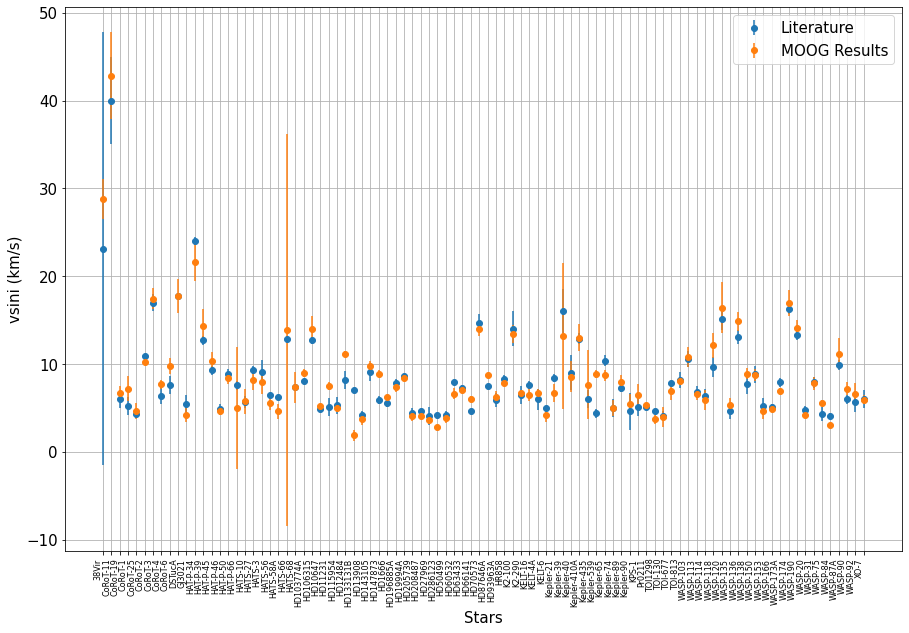

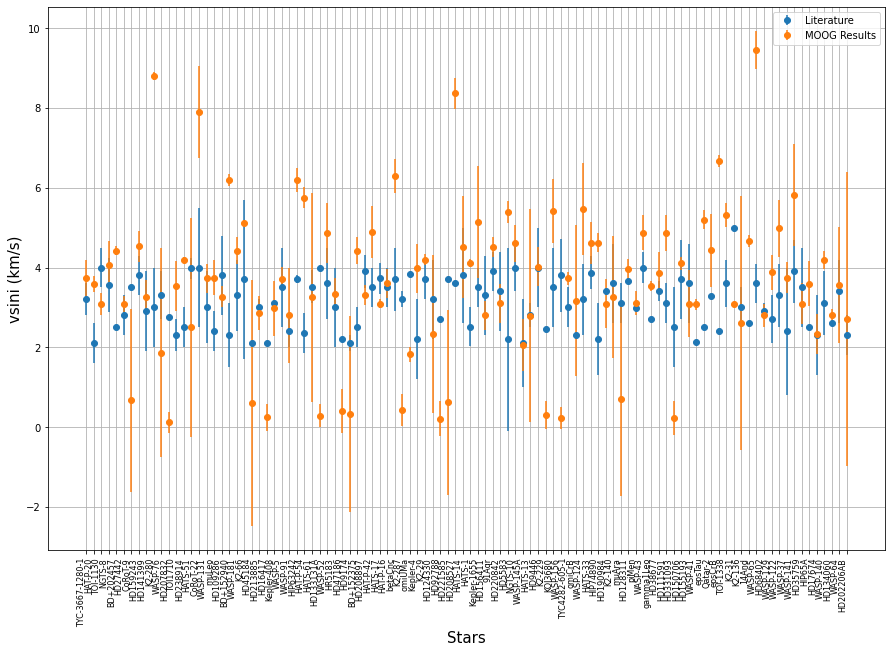

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.errorbar(LIT1[0],LIT1[1],yerr=LIT1[2], fmt="o",label="Literature")
ax.errorbar(RES1[0],RES1[5],yerr=RES1[9], fmt="o",label="MOOG Results")
plt.xticks(rotation=90, ha='right',fontsize=8)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
#plt.title('Comparison between MOOG and literture results 1')
plt.grid()
plt.xlabel('Stars',fontsize=15)
plt.ylabel('vsini (km/s)',fontsize=15)
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/comparison1.jpg")
plt.show()


fig, ax = plt.subplots(figsize=(15, 10))
ax.errorbar(LIT2[0],LIT2[1],yerr=LIT2[2], fmt="o",label="Literature")
ax.errorbar(RES2[0],RES2[5],yerr=RES2[9], fmt="o",label="MOOG Results")
plt.xticks(rotation=90, ha='right',fontsize=8)
plt.legend()
#plt.title('Comparison between MOOG and literture results 2')
plt.grid()
plt.xlabel('Stars',fontsize=15)
plt.ylabel('vsini (km/s)',fontsize=15)
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/comparison2.jpg")
plt.show()

In [31]:
LIT = [[],[],[]]
WLIT = [[],[],[]]
l1=len(lit1)
l2=len(lit2)
for i in range (l1):
    if str(lit1['star'][i]) in RES[0]:
        LIT[0].append(str(lit1['star'][i]))
        LIT[1].append(float(lit1['vsini'][i]))
        LIT[2].append(float(lit1['err1'][i]))
    elif str(lit1['star'][i]) in WRES[0]:
        WLIT[0].append(str(lit1['star'][i]))
        WLIT[1].append(float(lit1['vsini'][i]))
        WLIT[2].append(float(lit1['err1'][i]))

for i in range(l2):
    if str(lit2['star'][i]) in RES[0]:
        LIT[0].append(str(lit2['star'][i]))
        LIT[1].append(float(lit2['vsini'][i]))
        LIT[2].append(float(lit2['err1'][i]))
    elif str(lit2['star'][i]) in WRES[0]:
        WLIT[0].append(str(lit2['star'][i]))
        WLIT[1].append(float(lit2['vsini'][i]))
        WLIT[2].append(float(lit2['err1'][i]))

In [24]:
RES = [[],[],[],[],[],[],[],[],[],[]]
WRES = [[],[],[],[],[],[],[],[],[],[]]

for i in range(l1):
    if 0.1 < float(results1['vrot'][i]):
        RES[0].append(str(results1['Star'][i]))
        RES[1].append(float(results1['instr_broad'][i]))
        RES[2].append(float(results1['teff'][i]))
        RES[3].append(float(results1['logg'][i]))
        RES[4].append(float(results1['feh'][i]))
        RES[5].append(float(results1['vrot'][i]))
        RES[6].append(float(results1['vrot_err'][i]))
        RES[7].append(float(results1['vmac'][i]))
        RES[8].append(float(results1['status'][i]))
        RES[9].append(float(results1['vsini_final_err'][i]))
    else:
        WRES[0].append(str(results1['Star'][i]))
        WRES[1].append(float(results1['instr_broad'][i]))
        WRES[2].append(float(results1['teff'][i]))
        WRES[3].append(float(results1['logg'][i]))
        WRES[4].append(float(results1['feh'][i]))
        WRES[5].append(float(results1['vrot'][i]))
        WRES[6].append(float(results1['vrot_err'][i]))
        WRES[7].append(float(results1['vmac'][i]))
        WRES[8].append(float(results1['status'][i]))
        WRES[9].append(float(results1['vsini_final_err'][i]))
        '''List = [str(results2['Star'][i]),float(results2['instr_broad'][i]),float(results2['teff'][i]),float(results2['logg'][i]),float(results2['feh'][i]),float(results2['vrot'][i]),float(results2['vrot_err'][i]),float(results2['vmac'][i]),float(results2['status'][i]),float(results2['vsini_final_err'][i])]
        with open('listwrongresults.csv', 'a') as f_object:
 
        # Pass this file object to csv.writer()
        # and get a writer object
    
            writer_object = writer(f_object)
 
        # Pass the list as an argument into
        # the writerow()
            writer_object.writerow(List)
 
        # Close the file object
            f_object.close()'''
    
for i in range(l2):
    if 0.1 < float(results2['vrot'][i]) <10.0:
        RES[0].append(str(results2['Star'][i]))
        RES[1].append(float(results2['instr_broad'][i]))
        RES[2].append(float(results2['teff'][i]))
        RES[3].append(float(results2['logg'][i]))
        RES[4].append(float(results2['feh'][i]))
        RES[5].append(float(results2['vrot'][i]))
        RES[6].append(float(results2['vrot_err'][i]))
        RES[7].append(float(results2['vmac'][i]))
        RES[8].append(float(results2['status'][i]))
        RES[9].append(float(results2['vsini_final_err'][i]))
    else:
        WRES[0].append(str(results2['Star'][i]))
        WRES[1].append(float(results2['instr_broad'][i]))
        WRES[2].append(float(results2['teff'][i]))
        WRES[3].append(float(results2['logg'][i]))
        WRES[4].append(float(results2['feh'][i]))
        WRES[5].append(float(results2['vrot'][i]))
        WRES[6].append(float(results2['vrot_err'][i]))
        WRES[7].append(float(results2['vmac'][i]))
        WRES[8].append(float(results2['status'][i]))
        WRES[9].append(float(results2['vsini_final_err'][i]))
        '''List = [str(results2['Star'][i]),float(results2['instr_broad'][i]),float(results2['teff'][i]),float(results2['logg'][i]),float(results2['feh'][i]),float(results2['vrot'][i]),float(results2['vrot_err'][i]),float(results2['vmac'][i]),float(results2['status'][i]),float(results2['vsini_final_err'][i])]
        with open('listwrongresults.csv', 'a') as f_object:
 
        # Pass this file object to csv.writer()
        # and get a writer object
    
            writer_object = writer(f_object)
 
        # Pass the list as an argument into
        # the writerow()
            writer_object.writerow(List)
 
        # Close the file object
            f_object.close()'''

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.errorbar(LIT[0],LIT[1],yerr=LIT[2], fmt="o",markersize=5,label="Literature")
ax.errorbar(RES[0],RES[5],yerr=RES[9], fmt="o",markersize=5,label="MOOG Results")
plt.axvline(str(results2['Star'][1]), color='k')
plt.xticks(rotation=90, ha='right',fontsize=5)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
#plt.title('Comparison between MOOG and literture results')
plt.grid()
plt.xlabel('Stars',fontsize=15)
plt.ylabel('vsini (km/s)',fontsize=15)
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/comparisoneverything.jpg")
plt.show()

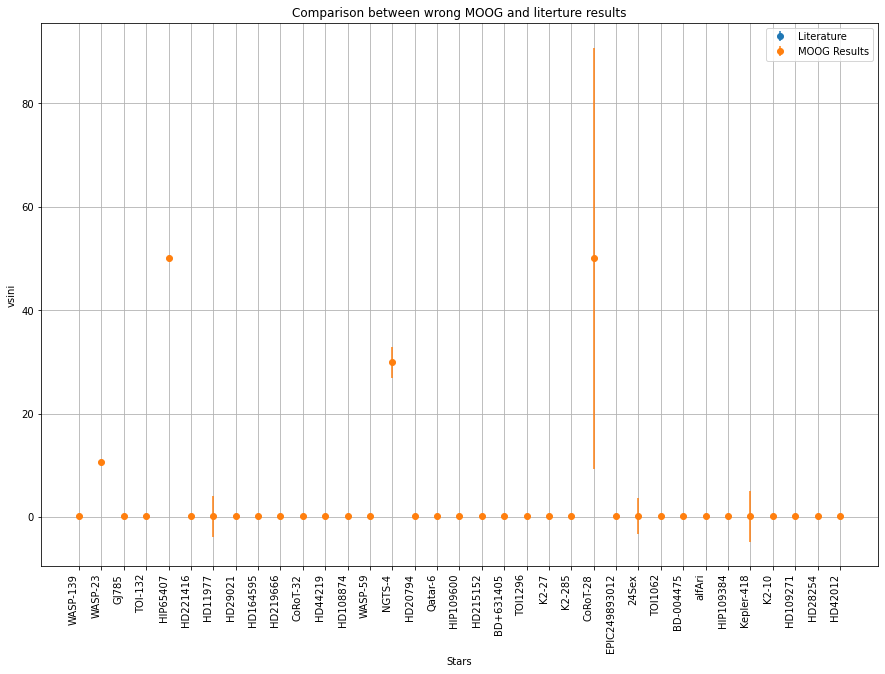

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.errorbar(WLIT[0],WLIT[1],yerr=WLIT[2], fmt="o",label="Literature")
ax.errorbar(WRES[0],WRES[5],yerr=WRES[9], fmt="o",label="MOOG Results")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Comparison between wrong MOOG and literture results')
plt.grid()
plt.xlabel('Stars')
plt.ylabel('vsini')
plt.show()

In [29]:
diff = [[],[],[]]
TEFFS = []
VMACS =[]
LOGGS =[]
FEHS = []
for i in range (len(LIT[0])):
    d = RES[5][i]-LIT[1][i]
    if d <10:
        diff[0].append(LIT[0][i])
        diff[1].append(d)
        diff[2].append(np.sqrt(RES[9][i]**2+LIT[2][i]**2))
    TEFFS.append(RES[2][i])
    VMACS.append(RES[7][i])
    LOGGS.append(RES[3][i])
    FEHS.append(RES[4][i])

Wdiff = [[],[],[]]
WTEFFS = []
WVMACS =[]
WLOGGS =[]
WFEHS = []
for i in range (len(WLIT[0])):
    d = WRES[5][i]-WLIT[1][i]
    Wdiff[0].append(WLIT[0][i])
    Wdiff[1].append(d)
    Wdiff[2].append(np.sqrt(WRES[9][i]**2+WLIT[2][i]**2))
    WTEFFS.append(WRES[2][i])
    WVMACS.append(WRES[7][i])
    WLOGGS.append(WRES[3][i])
    WFEHS.append(WRES[4][i])   

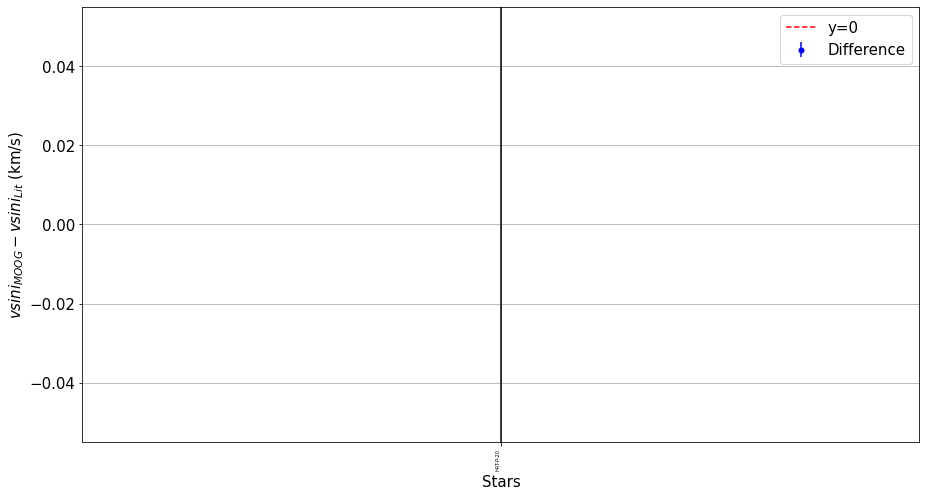

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(diff[0],diff[1],yerr=diff[2], fmt="bo", markersize=5,label='Difference')
plt.axvline(str(results2['Star'][1]), color='k')
plt.xticks(rotation=90, ha='right', fontsize=5)
plt.yticks(fontsize=15)
plt.plot(diff[0],np.zeros(len(diff[0])), 'r--',label='y=0')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.xlabel('Stars',fontsize=15)
plt.ylabel('$vsini_{MOOG} - vsini_{Lit}$ (km/s)', fontsize=15)
#plt.title('Difference between MOOG and literature results')
plt.legend(fontsize=15)
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

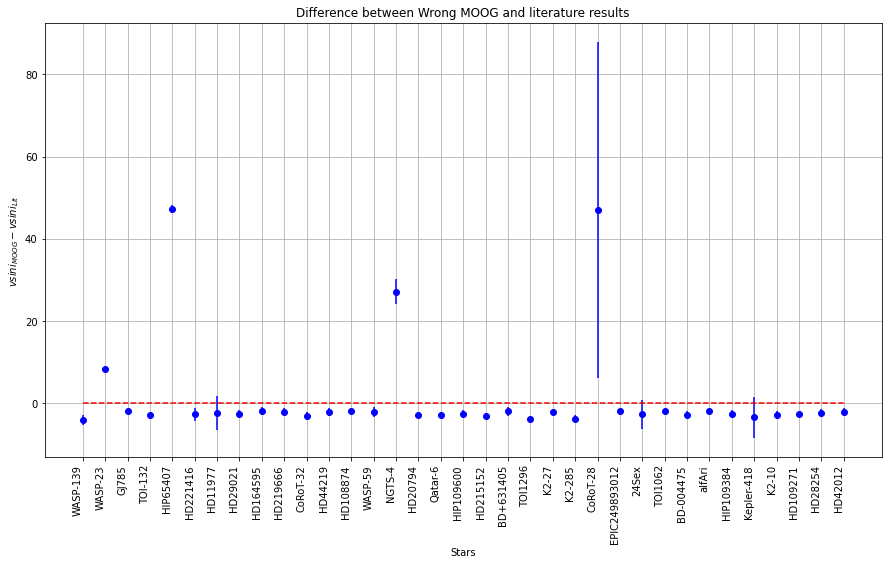

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(Wdiff[0],Wdiff[1],yerr=Wdiff[2], fmt="bo")
plt.xticks(rotation=90, ha='right')
plt.plot(Wdiff[0],np.zeros(len(Wdiff[0])), 'r--')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.xlabel('Stars')
plt.ylabel('$vsini_{MOOG} - vsini_{Lit}$')
plt.title('Difference between Wrong MOOG and literature results')
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

In [76]:
at,bt,rst=linfit(np.array(TEFFS),np.array(RES[5]))
print('%.3f'%at,'%.3f'%bt,'%.3f'%rst)

atd,btd,rstd=linfit(np.array(TEFFS),np.array(diff[1]))
print('%.3f'%atd,btd,'%.3f'%rstd)


-10.613 0.003 0.143
3.034 -0.0004625421070109569 0.031


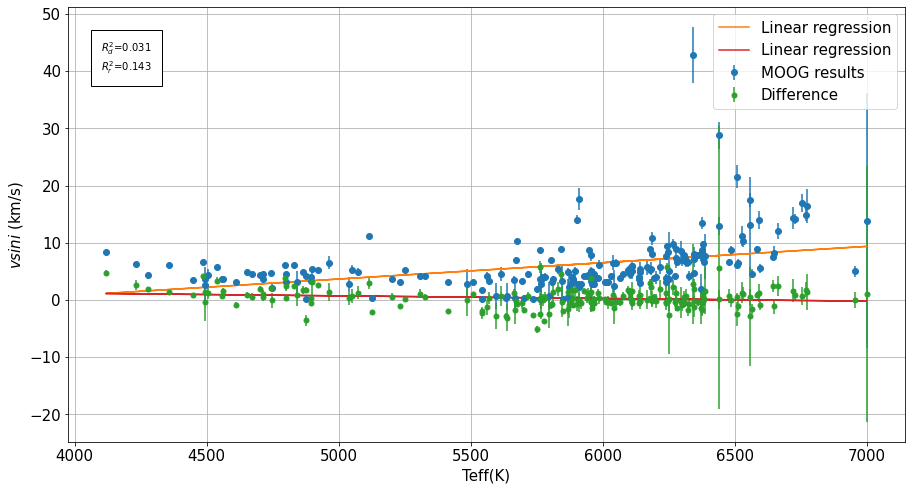

In [59]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(TEFFS,RES[5],yerr=RES[9], fmt="o", label='MOOG results')
plt.plot(TEFFS,at+np.array(TEFFS)*bt, label='Linear regression')
ax.errorbar(TEFFS,diff[1],yerr=diff[2], fmt="o", markersize=5,label='Difference')
plt.plot(TEFFS,atd+np.array(TEFFS)*btd,label='Linear regression')
ax.text(4100,40,'$R^2_d$=%.3f'%rstd+'\n$R^2_r$=%.3f'%rst, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
#ax.text(4100,30,'$R^2_r$=%.3f'%rst, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
#ax.errorbar(TEFFS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Teff(K)',fontsize=15)
plt.ylabel('$vsini$ (km/s)',fontsize=15)
#plt.title('Teff')
plt.savefig("/home/spec/WORK/PEEC2024/Figures/Teffvsdiff_linearreg.jpg")
plt.show()

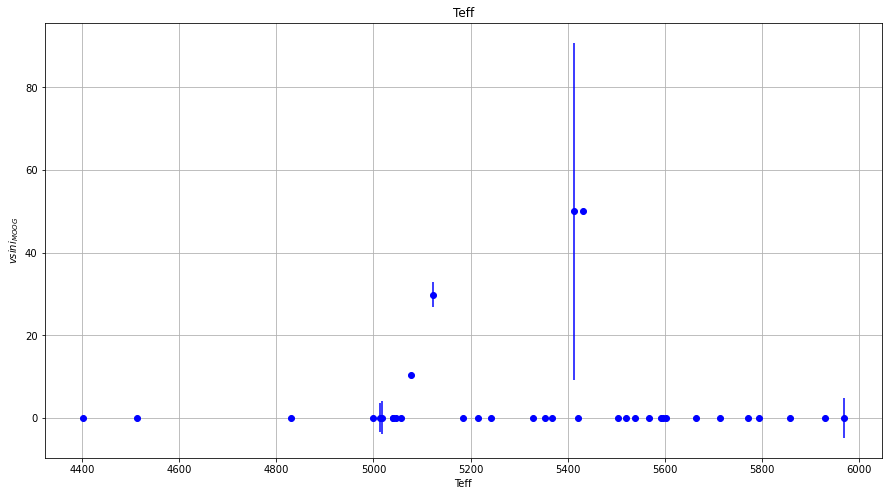

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(WTEFFS,WRES[5],yerr=WRES[9], fmt="bo")
#ax.errorbar(TEFFS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
#plt.xticks(rotation=90, ha='right')
#plt.legend()
plt.xlabel('Teff')
plt.ylabel('$vsini_{MOOG}$')
plt.title('Teff')
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

In [77]:
av,bv,rsv=linfit(np.array(VMACS),np.array(RES[5]))
print('%.3f'%av,'%.3f'%bv,'%.3f'%rsv)

avd,bvd,rsvd=linfit(np.array(VMACS),np.array(diff[1]))
print('%.3f'%avd,'%.3f'%bvd,'%.3f'%rsvd)

-0.197 1.587 0.166
0.993 -0.166 0.015


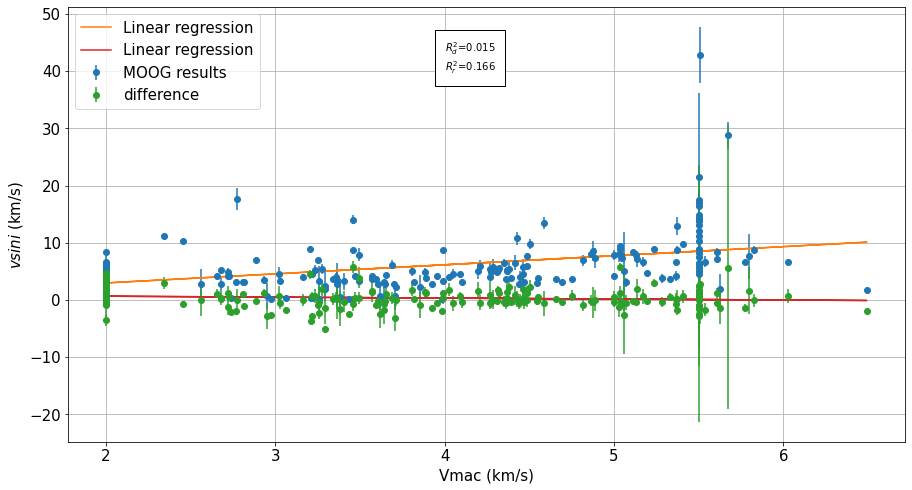

In [81]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(VMACS,RES[5],yerr=RES[9], fmt="o", label='MOOG results')
plt.plot(VMACS,av+np.array(VMACS)*bv, label='Linear regression')
ax.errorbar(VMACS,diff[1],yerr=diff[2], fmt="o", label='difference')
plt.plot(VMACS,avd+np.array(VMACS)*bvd, label='Linear regression')
ax.text(4,40,'$R^2_d$=%.3f'%rsvd+'\n$R^2_r$=%.3f'%rsv, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Vmac (km/s)', fontsize=15)
plt.ylabel('$vsini$ (km/s)', fontsize=15)
#plt.title('Vmac')
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/Vmac_linearregression.jpg")
plt.show()

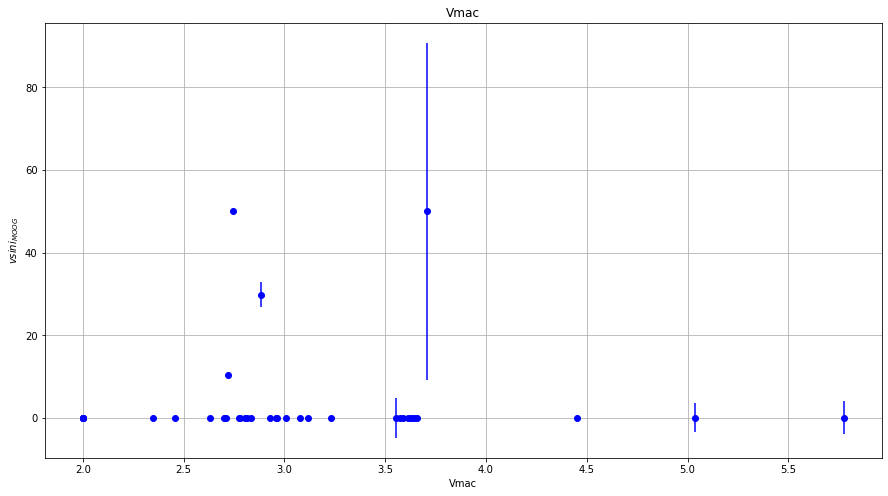

In [61]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(WVMACS,WRES[5],yerr=WRES[9], fmt="bo")
#ax.errorbar(VMACS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
#plt.xticks(rotation=90, ha='right')
#plt.plot(diff[0],np.zeros(len(diff[0])), 'r--')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.xlabel('Vmac')
plt.ylabel('$vsini_{MOOG}$')
plt.title('Vmac')
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

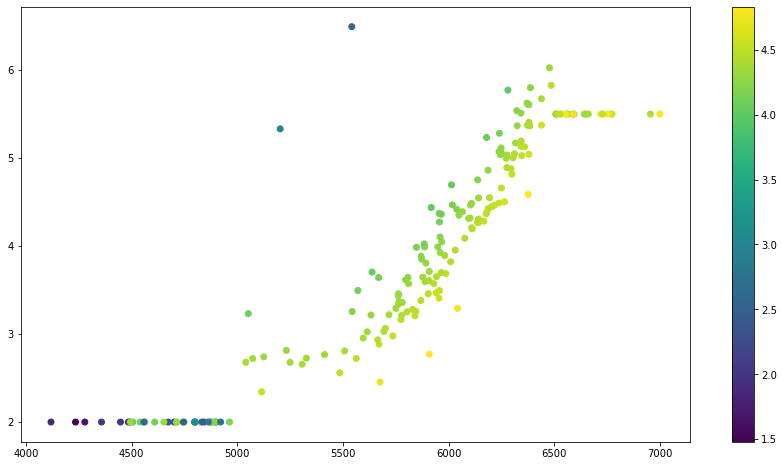

In [184]:
plt.figure(figsize=(15,8))
plt.scatter(TEFFS,VMACS,c=LOGGS)
plt.colorbar()
plt.show()

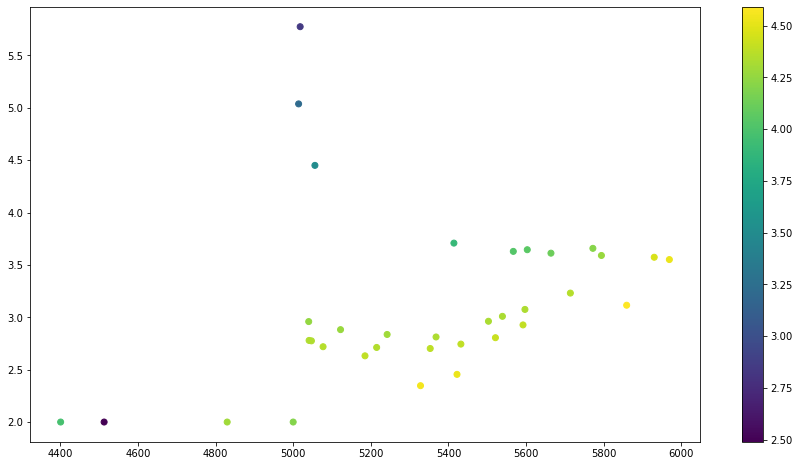

In [62]:
plt.figure(figsize=(15,8))
plt.scatter(WTEFFS,WVMACS,c=WLOGGS)
plt.colorbar()
plt.show()

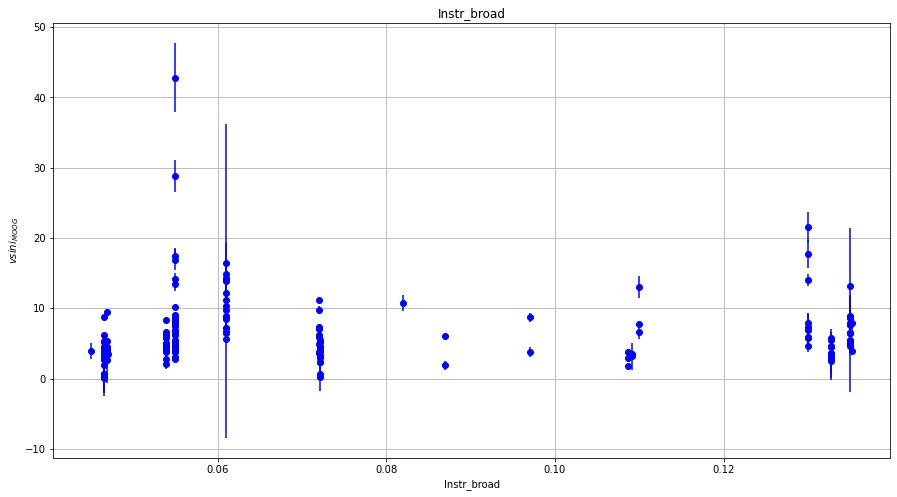

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(RES[1],RES[5],yerr=RES[9], fmt="bo")
#ax.errorbar(VMACS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
#plt.xticks(rotation=90, ha='right')
#plt.plot(diff[0],np.zeros(len(diff[0])), 'r--')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.xlabel('Instr_broad')
plt.ylabel('$vsini_{MOOG}$')
plt.title('Instr_broad')
#plt.xlim([0,0.15])
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

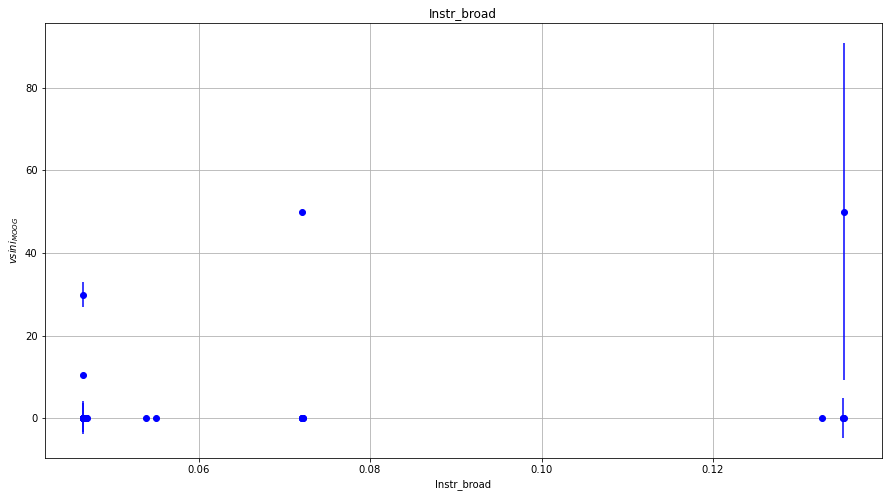

In [63]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(WRES[1],WRES[5],yerr=WRES[9], fmt="bo")
#ax.errorbar(VMACS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
#plt.xticks(rotation=90, ha='right')
#plt.plot(diff[0],np.zeros(len(diff[0])), 'r--')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.xlabel('Instr_broad')
plt.ylabel('$vsini_{MOOG}$')
plt.title('Instr_broad')
#plt.xlim([0,0.15])
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

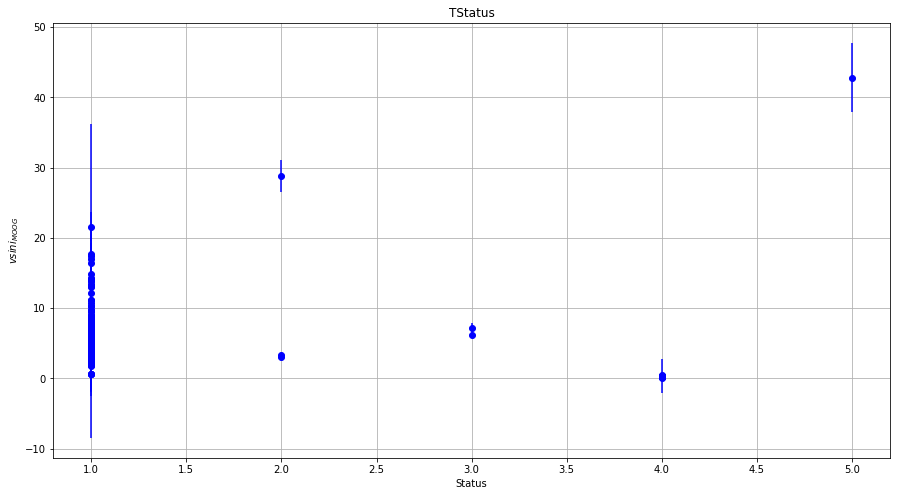

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(RES[8],RES[5],yerr=RES[9], fmt="bo")
#ax.errorbar(TEFFS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
#plt.xticks(rotation=90, ha='right')
#plt.legend()
plt.xlabel('Status')
plt.ylabel('$vsini_{MOOG}$')
plt.title('TStatus')
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

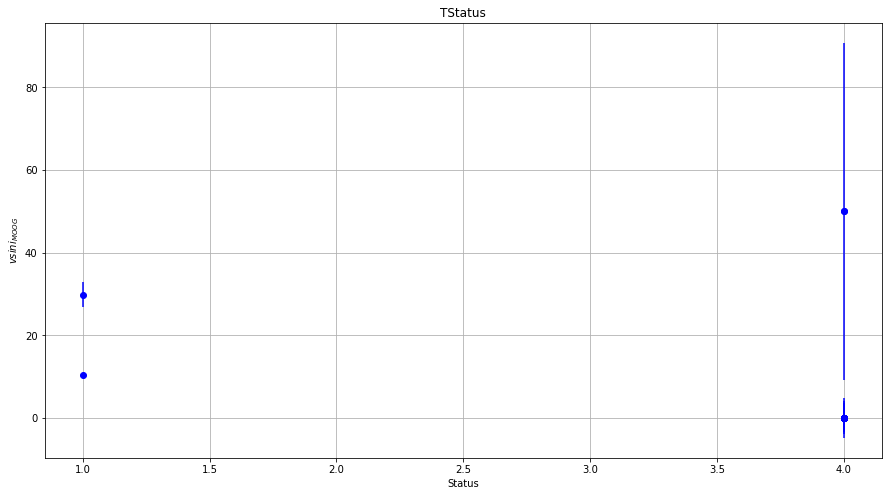

In [64]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(WRES[8],WRES[5],yerr=WRES[9], fmt="bo")
#ax.errorbar(TEFFS[l1:],RES2[5],yerr=RES2[9], fmt="ro")
#plt.xticks(rotation=90, ha='right')
#plt.legend()
plt.xlabel('Status')
plt.ylabel('$vsini_{MOOG}$')
plt.title('TStatus')
#plt.legend()
#plt.savefig("/home/spec/WORK/PEEC2024/Figures/diferenca.jpg")
plt.show()

In [78]:
al,bl,rsl=linfit(np.array(LOGGS),np.array(RES[5]))
print('%.3f'%al,'%.3f'%bl,'%.3f'%rsl)

ald,bld,rsld=linfit(np.array(LOGGS),np.array(diff[1]))
print('%.3f'%ald,'%.3f'%bld,'%.3f'%rsld)

1.166 1.162 0.025
3.473 -0.754 0.085


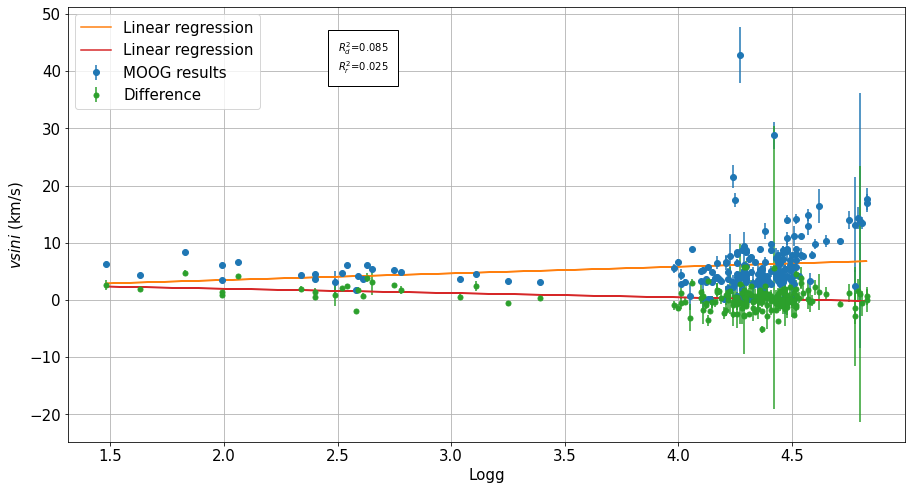

In [82]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(LOGGS,RES[5],yerr=RES[9], fmt="o", label='MOOG results')
plt.plot(LOGGS,al+np.array(LOGGS)*bl, label='Linear regression')
ax.errorbar(LOGGS,diff[1],yerr=diff[2], fmt="o", markersize=5,label='Difference')
plt.plot(LOGGS,ald+np.array(LOGGS)*bld, label='Linear regression')
ax.text(2.5,40,'$R^2_d$=%.3f'%rsld+'\n$R^2_r$=%.3f'%rsl, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Logg', fontsize=15)
plt.ylabel('$vsini$ (km/s)', fontsize=15)
#plt.title('Vmac')
plt.savefig("/home/spec/WORK/PEEC2024/Figures/Logg_linearregression.jpg")
plt.show()

In [79]:
af,bf,rsf=linfit(np.array(FEHS),np.array(RES[5]))
print('%.3f'%af,'%.3f'%bf,'%.3f'%rsf)

afd,bfd,rsfd=linfit(np.array(FEHS),np.array(diff[1]))
print('%.3f'%afd,'%.3f'%bfd,'%.3f'%rsfd)

5.920 0.667 0.001
0.444 -0.961 0.013


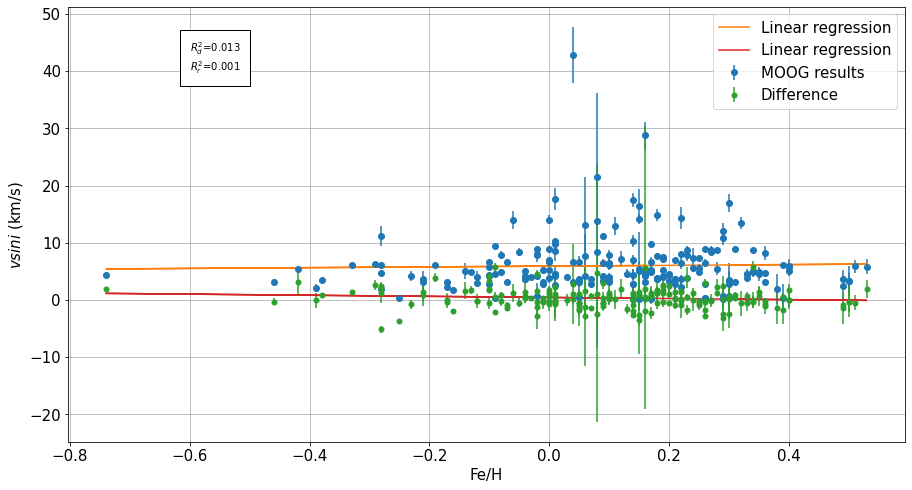

In [84]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.grid()
ax.errorbar(FEHS,RES[5],yerr=RES[9], fmt="o", label='MOOG results')
plt.plot(FEHS,af+np.array(FEHS)*bf,  label='Linear regression')
ax.errorbar(FEHS,diff[1],yerr=diff[2], fmt="o", markersize=5,label='Difference')
plt.plot(FEHS,afd+np.array(FEHS)*bfd, label='Linear regression')
ax.text(-0.6,40,'$R^2_d$=%.3f'%rsfd+'\n$R^2_r$=%.3f'%rsf, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Fe/H', fontsize=15)
plt.ylabel('$vsini$ (km/s)', fontsize=15)
#plt.title('Vmac')
plt.savefig("/home/spec/WORK/PEEC2024/Figures/Feh_linearregression.jpg")
plt.show()